In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pyod.models.iforest import IForest
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
import h2o
from h2o.automl import H2OAutoML

import warnings
warnings.filterwarnings('ignore')

In [7]:
dTrain = pd.read_csv('train.csv')
dTest = pd.read_csv('test.csv')

In [8]:
dTrain

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [9]:
dTest

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [18]:
dTest.shape

(1601, 11)

In [19]:
dTrain.shape

(6400, 12)

In [20]:
dTrain.isna().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

In [21]:
dTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [22]:
dTrain.shape

(6400, 12)

In [23]:
dTrain.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


<Axes: >

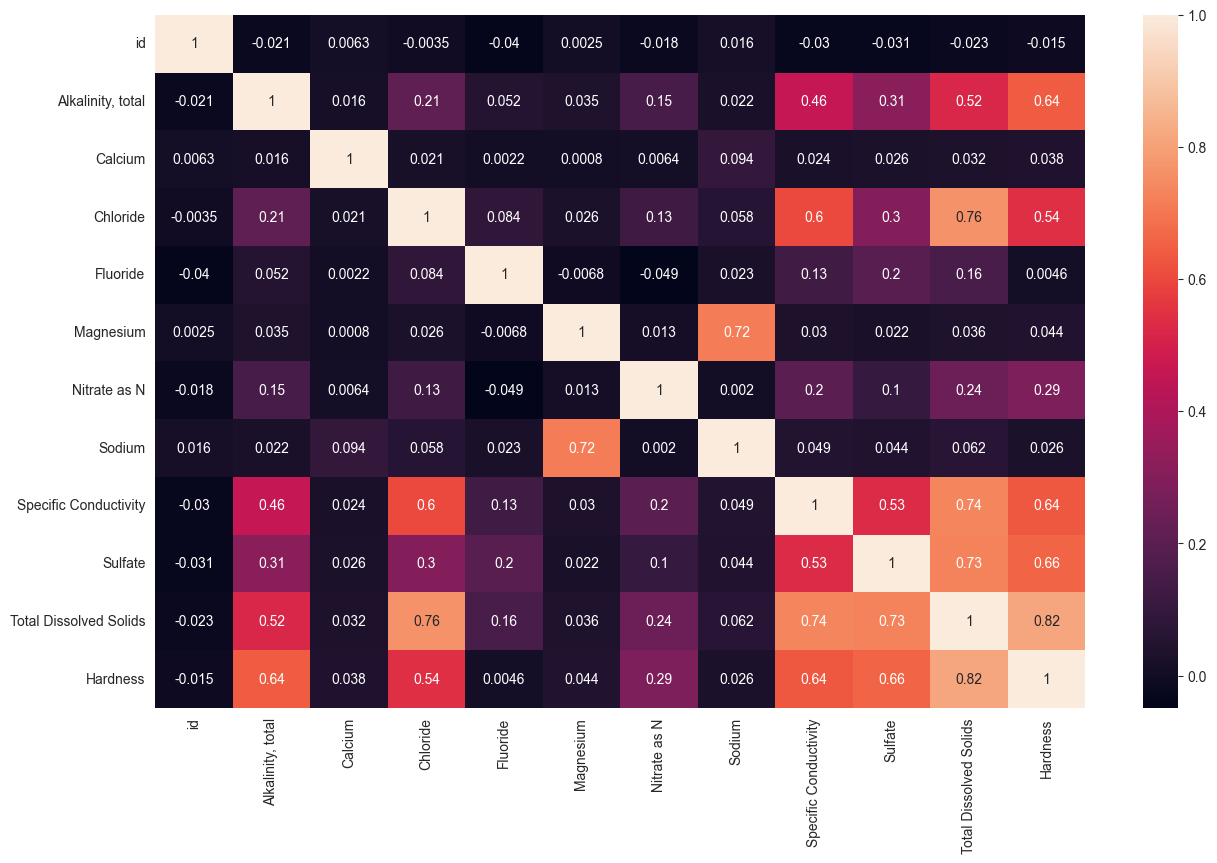

In [24]:
plt.figure(figsize=(15,9))
tcorr = dTrain.corr(method='pearson')
sns.heatmap(tcorr, annot=True) 

In [25]:
col = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids', 'Hardness']

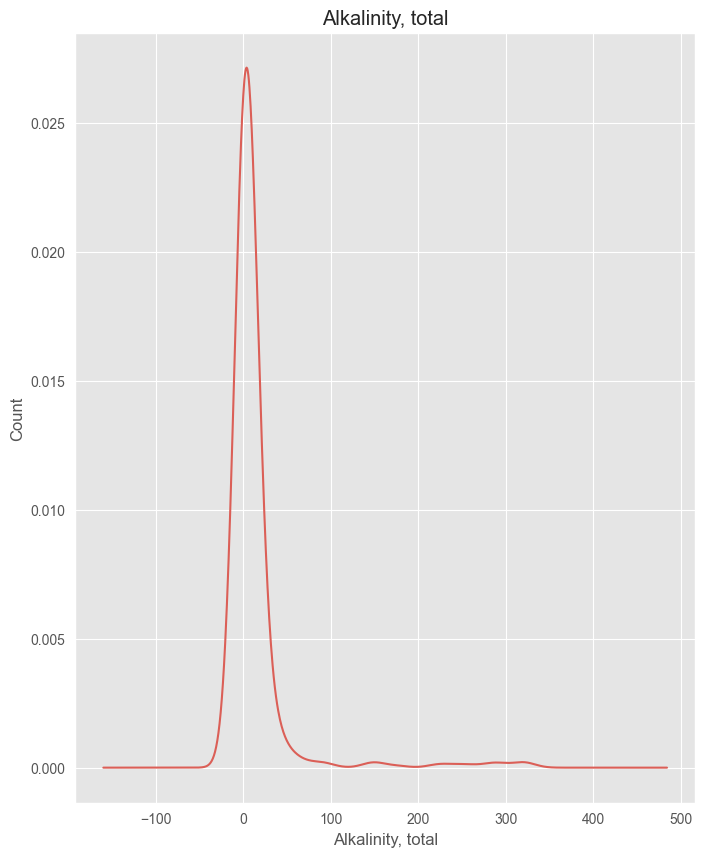

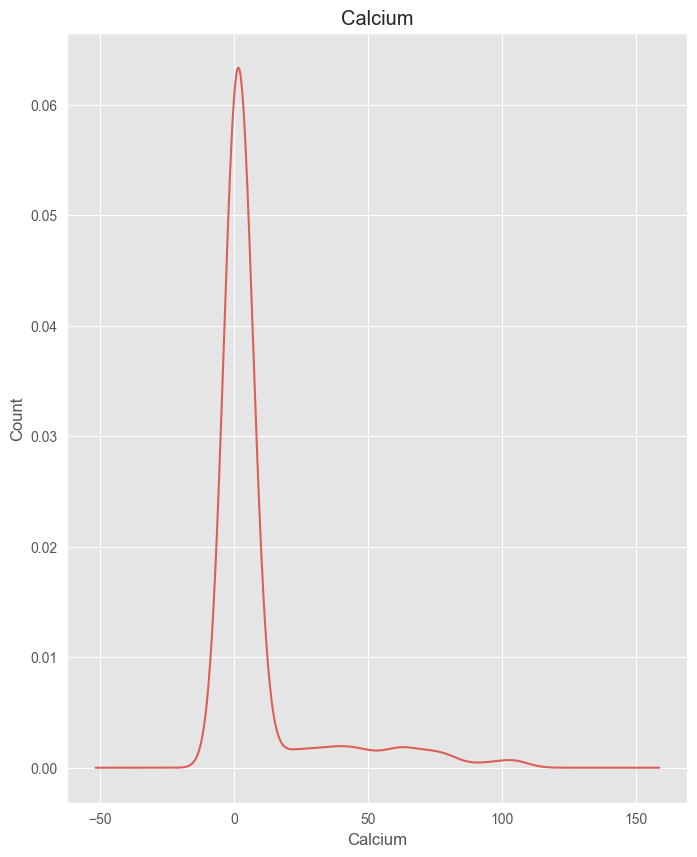

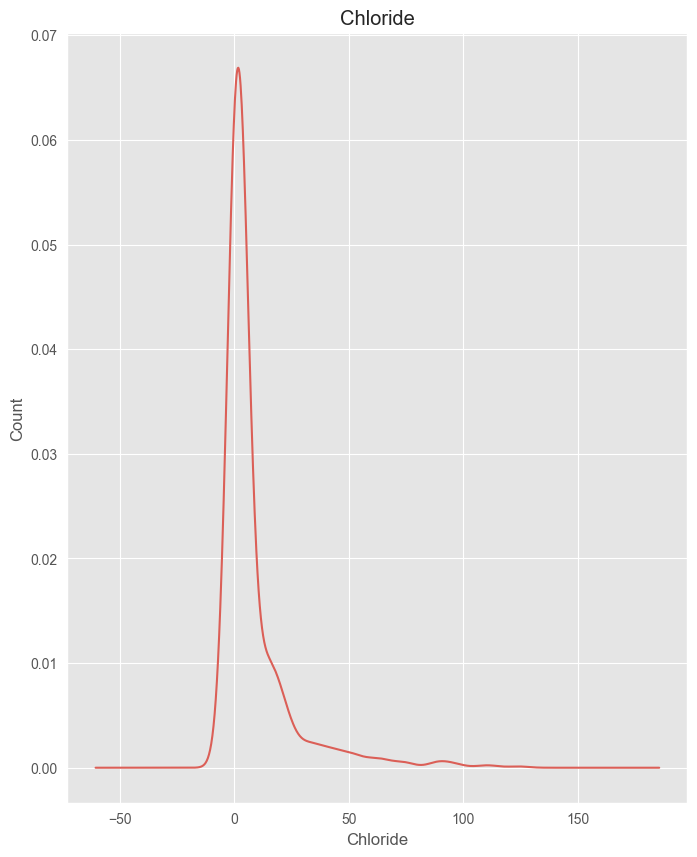

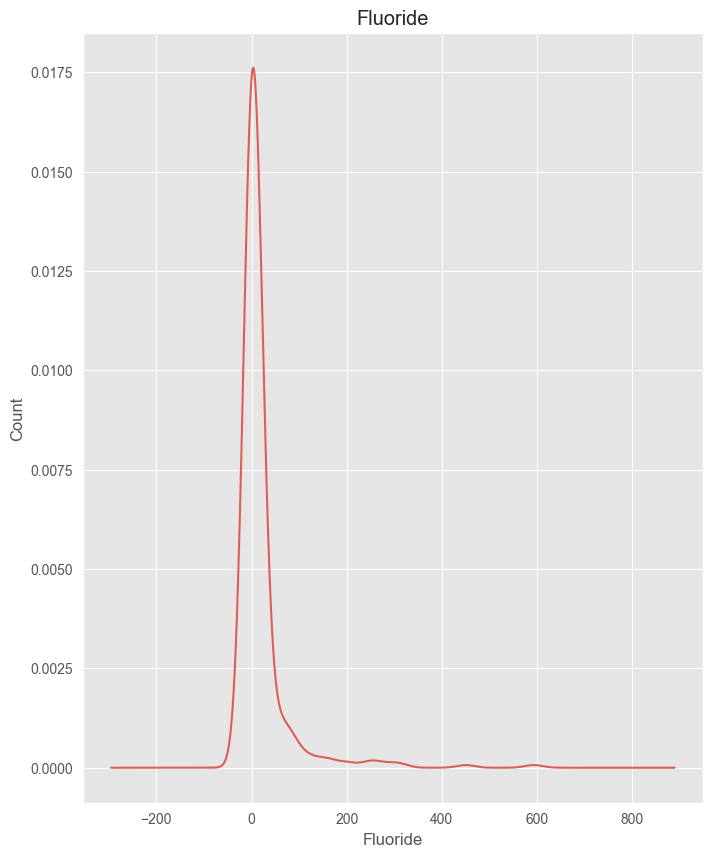

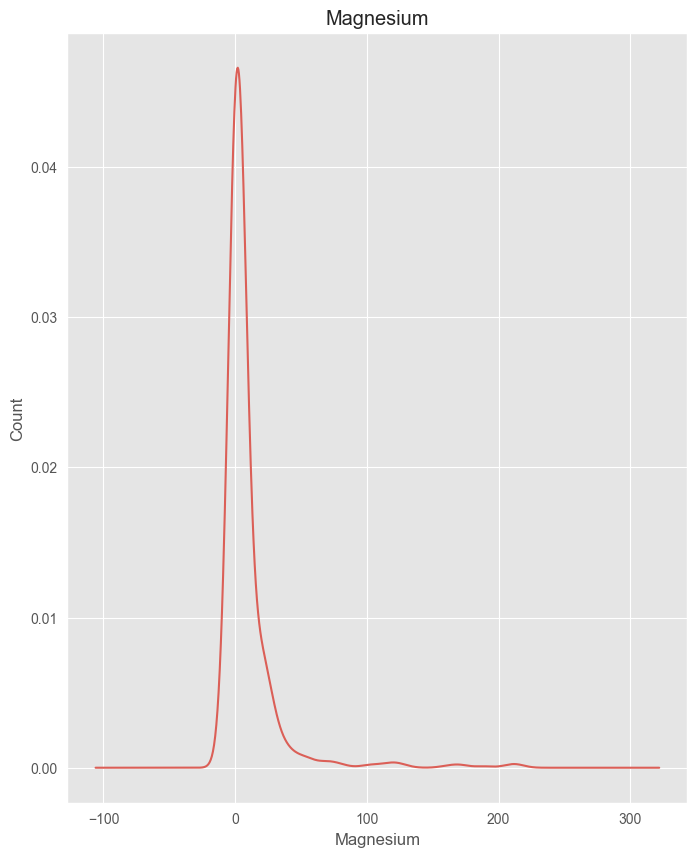

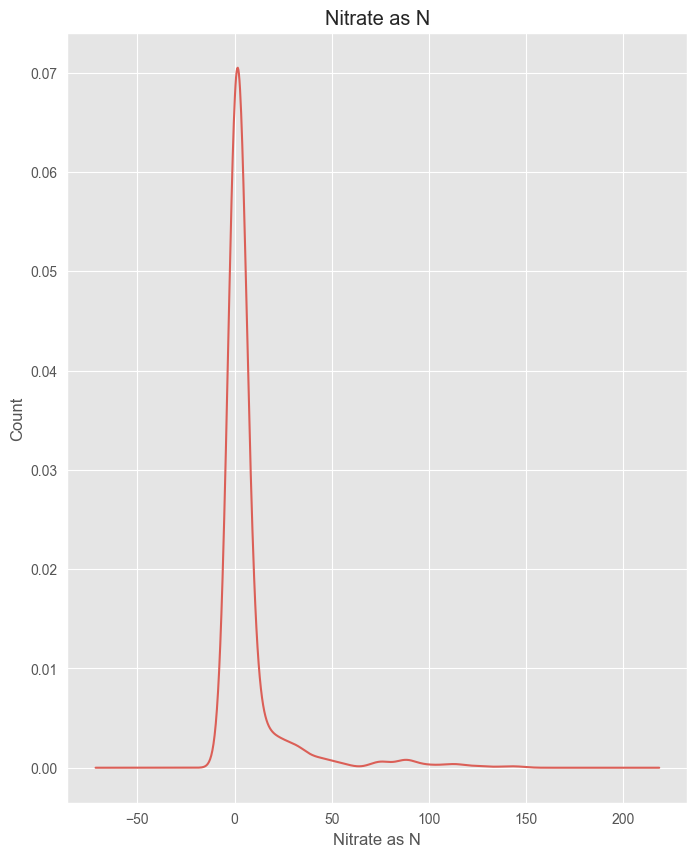

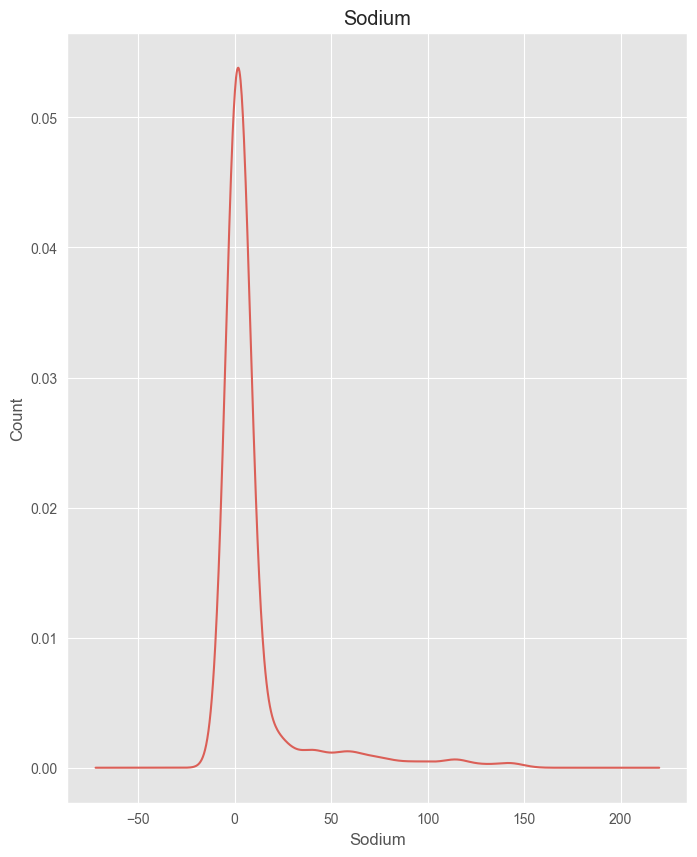

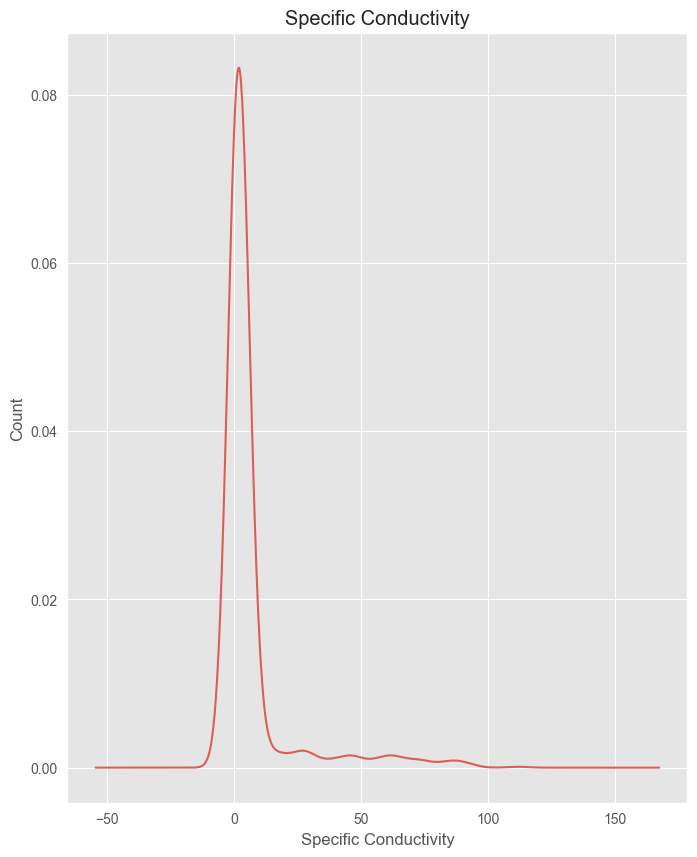

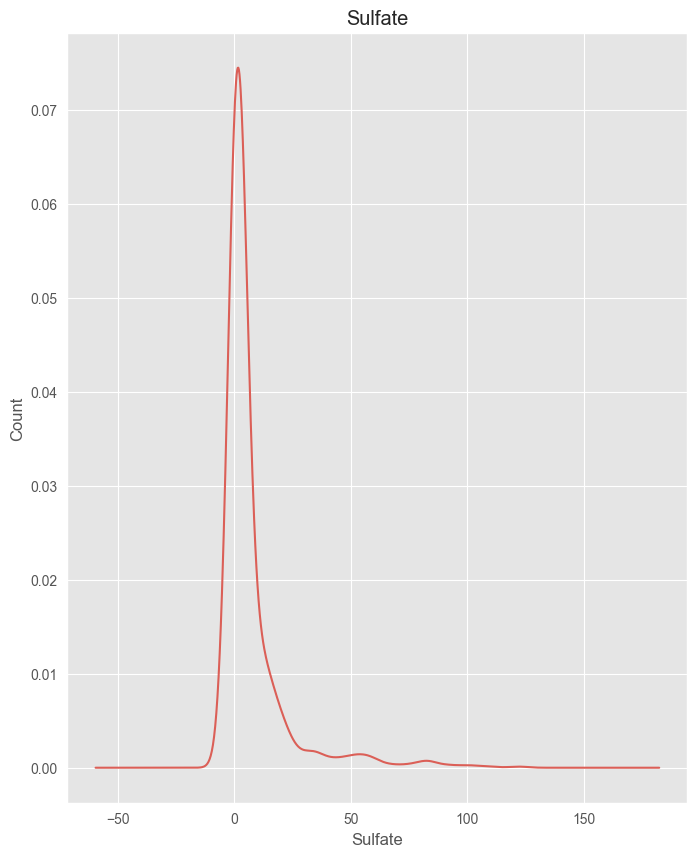

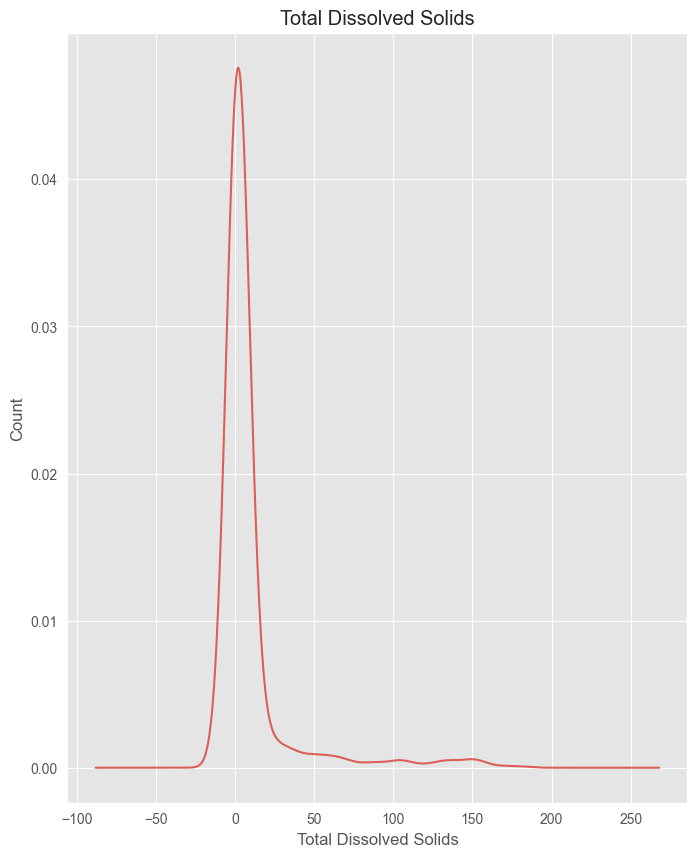

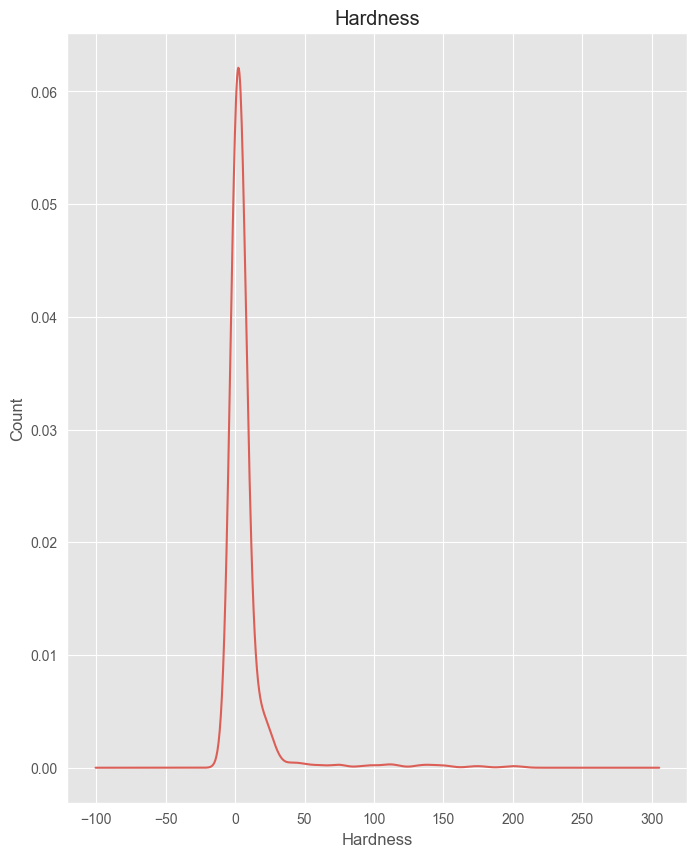

In [26]:
plt.style.use('ggplot')
bar_colors = sns.color_palette("hls", 8)

for kolom in col:
    plt.figure(figsize=(8, 10))
    counts = dTrain[kolom].value_counts()
    counts.plot(kind='kde', color=bar_colors)
    plt.xlabel(kolom)
    plt.ylabel("Count")
    plt.title(kolom)


In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from D:\Drive D\coleyah at ubeh\Lomba\Academy compfest\Notebooks\compfestTahap1\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\diyan\AppData\Local\Temp\tmp9s_o0y8u
  JVM stdout: C:\Users\diyan\AppData\Local\Temp\tmp9s_o0y8u\h2o_diyan_started_from_python.out
  JVM stderr: C:\Users\diyan\AppData\Local\Temp\tmp9s_o0y8u\h2o_diyan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Jakarta
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,"21 days, 3 hours and 42 minutes"
H2O_cluster_name:,H2O_from_python_diyan_ky2nc4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.852 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [11]:
fcol = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']
tcol = 'Hardness'

In [12]:
X = dTrain[fcol]
y = dTrain[tcol]

In [13]:
X_train, X_val, y_train, y_val = tts(X, y,test_size=0.3, random_state=0)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(dTest[fcol])

In [15]:
train_data = pd.concat([pd.DataFrame(X_train_scaled, columns=fcol), y_train.reset_index(drop=True)], axis=1)
val_data = pd.concat([pd.DataFrame(X_val_scaled, columns=fcol), y_val.reset_index(drop=True)], axis=1)
test_data = pd.DataFrame(test_data_scaled, columns=fcol)

In [16]:
h2o_train = h2o.H2OFrame(train_data)
h2o_val = h2o.H2OFrame(val_data)
h2o_test = h2o.H2OFrame(test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
x = fcol
y = tcol

In [18]:
aml = H2OAutoML(max_runtime_secs=3600, seed=42, nfolds=5)
aml.train(x=x, y=y, training_frame=h2o_train, validation_frame=h2o_val)

AutoML progress: |
20:35:42.979: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
20:35:42.989: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [19]:
lb = aml.leaderboard
print(lb)

model_id                                                             rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240702_203542           48.377   2340.33  23.4919  nan                          2340.33
StackedEnsemble_AllModels_2_AutoML_1_20240702_203542              48.6114  2363.07  23.5395    0.2368                     2363.07
StackedEnsemble_AllModels_1_AutoML_1_20240702_203542              48.6136  2363.28  23.597     0.236278                   2363.28
StackedEnsemble_BestOfFamily_7_AutoML_1_20240702_203542           48.6615  2367.94  23.4601  nan                          2367.94
StackedEnsemble_BestOfFamily_3_AutoML_1_20240702_203542           48.7032  2372.01  23.8673    0.239666                   2372.01
StackedEnsemble_BestOfFamily_5_AutoML_1_20240702_203542           48.717   2373.34  23.5061  nan                          2373.34
StackedEnsemble_BestOfFamily_8_AutoML_1_20240702_203542           48.82    2383.39  23.548

In [20]:
train_preds = aml.leader.predict(h2o_train)
train_pred_df = h2o.as_list(train_preds, use_pandas=True)
train_r2 = r2_score(y_train, train_pred_df['predict'])
print("AutoML R^2 score on training set: ", train_r2)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
AutoML R^2 score on training set:  0.9233736171087439


In [21]:
val_preds = aml.leader.predict(h2o_val)
val_pred_df = h2o.as_list(val_preds, use_pandas=True)
val_r2 = r2_score(y_val, val_pred_df['predict'])
print("AutoML R^2 score on validation set: ", val_r2)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
AutoML R^2 score on validation set:  0.9303687985535408


In [22]:
test_preds = aml.leader.predict(h2o_test)
test_pred_df = h2o.as_list(test_preds, use_pandas=True)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [23]:
submit = pd.DataFrame({
    'id': dTest['id'],
    'Hardness': test_pred_df['predict'],
})

In [25]:
submit.to_csv('submission_h2o.csv', index=False)
print("Submit h2o : submission_h2o.csv")

Submit h2o : submission_h2o.csv
